In [91]:
import pandas as pd
import openml
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import numpy as np
import seaborn as sns

In [81]:
#Source: https://archive.ics.uci.edu/ml/datasets/bank+marketing
df = pd.read_csv("bank\\bank.csv",delimiter=";")


In [11]:
# for k, v in data.items():
#     print(k)
#     print(v)

df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [14]:
df.shape


(4521, 17)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [15]:
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


**Author**: Dr. Hans Hofmann  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)) - 1994    
**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)

**German Credit dataset**  
This dataset classifies people described by a set of attributes as good or bad credit risks.

This dataset comes with a cost matrix: 
``` 
Good  Bad (predicted)  
Good   0    1 (actual)  
Bad    5    0  
```

It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1).  

### Attribute description  

1. Status of existing checking account, in Deutsche Mark.  
2. Duration in months  
3. Credit history (credits taken, paid back duly, delays, critical accounts)  
4. Purpose of the credit (car, television,...)  
5. Credit amount  
6. Status of savings account/bonds, in Deutsche Mark.  
7. Present employment, in number of years.  
8. Installment rate in percentage of disposable income  
9. Persona

In [16]:
df.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [83]:
day_month = pd.to_datetime(df["month"] + "/"  +df["day"].astype(str) + "/2022" )
df["month"] = day_month.dt.month


In [84]:
df.month.unique()

array([10,  5,  4,  6,  2,  8,  1,  7, 11,  9,  3, 12], dtype=int64)

In [85]:

df_temp = df.sort_values(["campaign","month","day"]).reset_index().reset_index()
cols = df_temp.columns.tolist() #[0] = ["chrono_order"] #,"orig_order"]
cols[:2] = ["chrono_order","orig_order"]
df_temp.columns = cols
df = df_temp
#df["chrono_order"] = np.arange(df.sort_values(["campaign","month","day"]).shape[0])
#reset_index(drop=True)



<AxesSubplot: xlabel='chrono_order'>

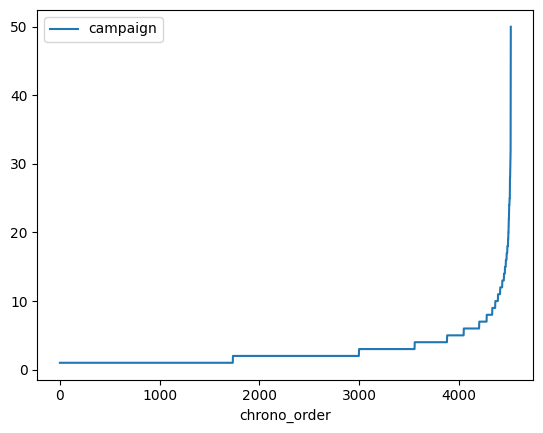

In [86]:
#campaigns over time
df.plot(x ="chrono_order",y ="campaign", kind="line")


In [87]:
d= {}
d["duration"]  = ["sum","count"]
df_camp = df.groupby(["campaign","month","day"]).agg(d).reset_index()
#df_camp[df_camp["campaign"] == 3]   .plot(x="day",y="duration")

x = []
df_camp.columns = ["campaign","month","day","duration","count"]


In [75]:
df_camp

,campaign,month,day,duration,count
0,1,10,1,3022,17
1,1,10,2,11926,58
2,1,10,3,8946,39
3,1,10,4,13623,55
4,1,10,5,25189,93
...,...,...,...,...,...
360,31,10,28,33,1
361,32,10,2,29,1
362,32,10,16,192,1
363,44,10,31,18,1


<AxesSubplot: xlabel='day', ylabel='count'>

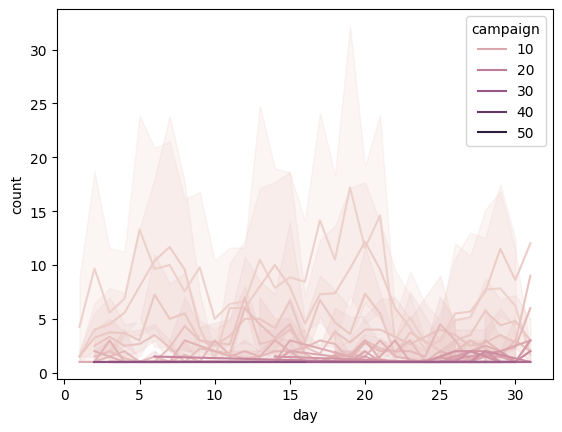

In [92]:
sns.lineplot(data=df_camp, x="day", y="count",hue="campaign")

In [76]:
d= {}
d["duration"]  = ["sum","count"]
df_camp = df.groupby(["campaign","month"]).agg(d).reset_index()
#df_camp[df_camp["campaign"] == 3]   .plot(x="day",y="duration")

x = []

df_camp.columns = ["campaign","month","duration","count"]



In [79]:
df.month.unique()

array([10], dtype=int64)

<AxesSubplot: xlabel='month', ylabel='count'>

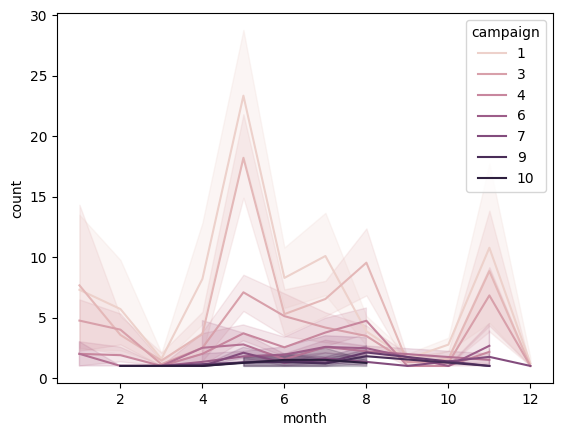

In [90]:
sns.lineplot(data=df_camp[df_camp.campaign < 11], x="month", y="count",hue="campaign")

In [ ]:

a = {}
a["age"] = ["mean","median"]
a["balance"] = ["mean","median"]
df.groupby("job").agg(a)


<AxesSubplot: >

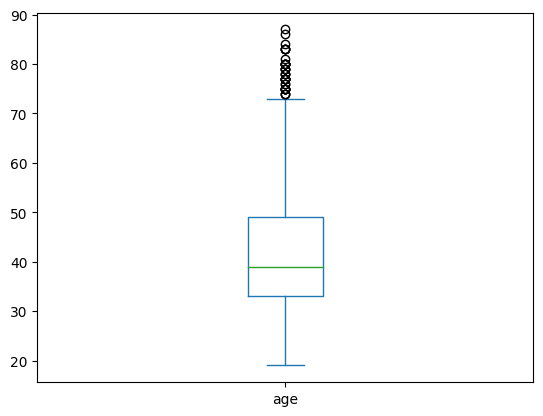

In [20]:

df["age"].sort_values().to_frame().reset_index(drop=True).plot(kind="box")


In [36]:
df["purpose"].value_counts()

radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
education               50
repairs                 22
domestic appliance      12
other                   12
retraining               9
vacation                 0
Name: purpose, dtype: int64

<AxesSubplot: >

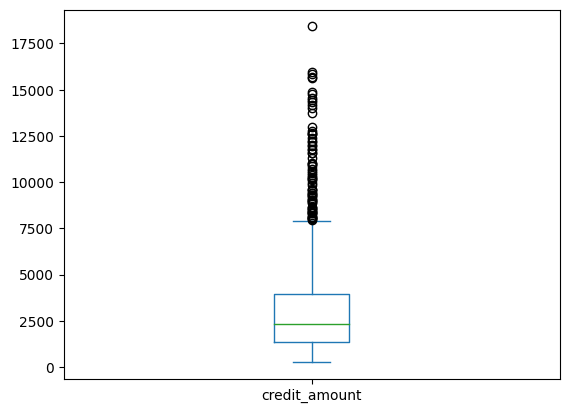

In [40]:
df["credit_amount"].plot(kind="box")



In [25]:
#EDA
mask = df.y == "yes"
df[mask]["loan"].value_counts(normalize=True)*100


no     91.746641
yes     8.253359
Name: loan, dtype: float64

In [31]:

vc = df[["y","loan","job","marital","education"]].value_counts().to_frame()


In [35]:
import seaborn as sns


<AxesSubplot: xlabel='education', ylabel='age'>

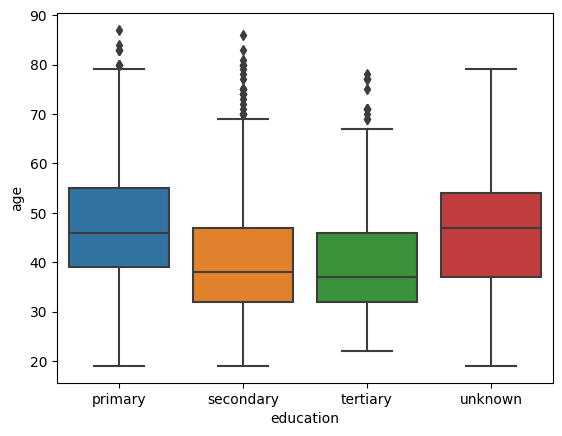

In [37]:

sns.boxplot(x="education",y ="age",data=df)


<AxesSubplot: >

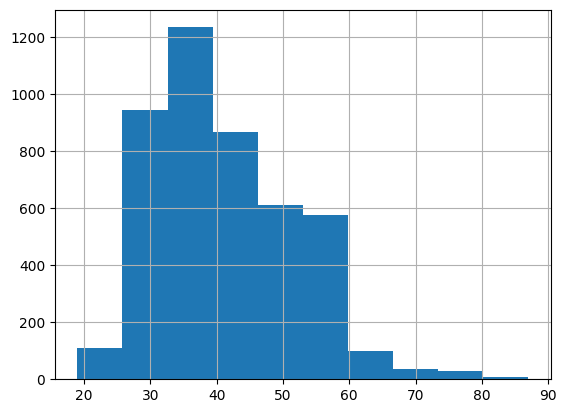

In [38]:
df["age"].hist()